In [3]:
import pandas as pd

### 파산한 은행의 수 데이터

In [4]:
# 은행 데이터 확인
banks = pd.read_csv('banklist.csv')
print(banks.info())
print(banks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwa

In [5]:
# 5,6번 열을 datetime 오브젝트로 변환하여 불러오기
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [6]:
# dt 접근자와 quarter(분기), year 사용
banks['closing_quarter'] = banks['Closing Date'].dt.quarter
banks['closing_year'] = banks['Closing Date'].dt.year

banks.head

<bound method NDFrame.head of                                              Bank Name         City  ST  \
0                  Washington Federal Bank for Savings      Chicago  IL   
1      The Farmers and Merchants State Bank of Argonia      Argonia  KS   
2                                  Fayette County Bank   Saint Elmo  IL   
3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI   
4                                       First NBC Bank  New Orleans  LA   
..                                                 ...          ...  ..   
550                                 Superior Bank, FSB     Hinsdale  IL   
551                                Malta National Bank        Malta  OH   
552                    First Alliance Bank & Trust Co.   Manchester  NH   
553                  National State Bank of Metropolis   Metropolis  IL   
554                                   Bank of Honolulu     Honolulu  HI   

      CERT                Acquiring Institution Closing Date Updated 

In [7]:
# 연도별 파산 현황 확인
banks['closing_year'].value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: closing_year, dtype: int64

In [8]:
banks.groupby(['closing_year']).size()  # 위와 동일

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [9]:
# 연도별/분기별 파산 현황 확인
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
closing_year_q.head()

closing_year  closing_quarter
2000          4                  2
2001          1                  1
              2                  1
              3                  2
2002          1                  6
dtype: int64

<AxesSubplot:xlabel='closing_year,closing_quarter'>

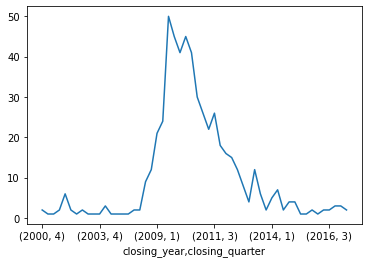

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
closing_year_q.plot()

In [14]:
fig, ax = plt.subplots()
ax = closing_year.plot()
fig = closing_year_q.plot()

In [79]:
closing_q = banks.groupby('closing_quarter').count()
closing_q

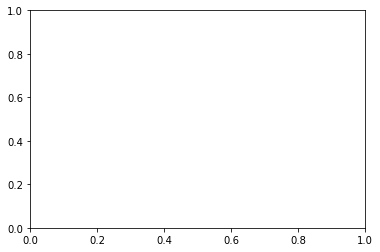

In [68]:
ax = plt.subplots()

<BarContainer object of 4 artists>

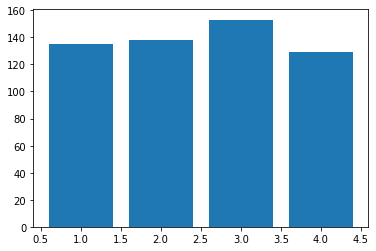

In [83]:
plt.bar(closing_q.index, closing_q.closing_year)

<AxesSubplot:xlabel='closing_quarter'>

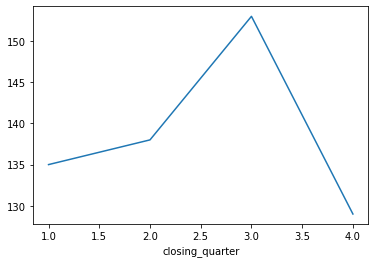

In [12]:
banks.groupby('closing_quarter').size().plot()

### 테슬라 주식 데이터

In [18]:
# 데이터 확인 후 date 형식은 parse_dates 활용하여 datetime 오브젝트로 변환
tesla = pd.read_csv('tesla_stock_quandl.csv', parse_dates=['Date'])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


In [26]:
# dt 활용하여 year, month, day, quarter 등 따로 사용 가능
tesla.Date.dt.year == 2010
tesla[tesla.Date.dt.year == 2010]
tesla[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.quarter == 2)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


In [29]:
tesla.index = tesla['Date']     # Date를 인덱스로 지정
print(tesla.index)
tesla.head()

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [34]:
# Date 인덱스 지정 후 아래처럼 활용 가능
tesla['2015']
tesla['2016-10']
# tesla.loc['2018-03-20']

C:\Users\admin\AppData\Local\Temp\ipykernel_2916\2520998635.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2015']
C:\Users\admin\AppData\Local\Temp\ipykernel_2916\2520998635.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2016-10']


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2016-10-31,2016-10-31,202.49,202.4900,195.81,197.73,4692273.0,0.0,1.0,202.49,202.4900,195.81,197.73,4692273.0
2016-10-28,2016-10-28,204.00,205.3200,199.83,199.97,4280141.0,0.0,1.0,204.00,205.3200,199.83,199.97,4280141.0
2016-10-27,2016-10-27,211.34,213.7000,201.65,204.01,13093744.0,0.0,1.0,211.34,213.7000,201.65,204.01,13093744.0
2016-10-26,2016-10-26,201.00,203.1900,200.10,202.24,5632841.0,0.0,1.0,201.00,203.1900,200.10,202.24,5632841.0
2016-10-25,2016-10-25,202.90,204.6900,201.20,202.34,2445014.0,0.0,1.0,202.90,204.6900,201.20,202.34,2445014.0
2016-10-24,2016-10-24,201.00,203.9452,200.25,202.76,2751562.0,0.0,1.0,201.00,203.9452,200.25,202.76,2751562.0
2016-10-21,2016-10-21,198.60,201.5700,197.41,200.09,2943402.0,0.0,1.0,198.60,201.5700,197.41,200.09,2943402.0
2016-10-20,2016-10-20,202.12,203.0000,197.05,199.10,5072877.0,0.0,1.0,202.12,203.0000,197.05,199.10,5072877.0
2016-10-19,2016-10-19,199.74,206.6600,198.06,203.56,6991183.0,0.0,1.0,199.74,206.6600,198.06,203.56,6991183.0


In [38]:
pd.date_range(start = '2015-01-01', end = '2015-12-31')
pd.date_range(start = '2015-01-01', end = '2015-12-31', freq = 'B')   # 평일만 표시
pd.date_range(start = '2015-01-01', end = '2015-12-31', freq = 'Q')   # 분기별 마지막 일자 표시

DatetimeIndex(['2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31'], dtype='datetime64[ns]', freq='Q-DEC')